# Stat 350 Lab 8

# Due Tuesday, November 28 11:59 PM

**You are required to work on this lab with a partner. Only one member of each pair should submit the lab.**

**Please type your Cal Poly IDs (e.g., kjross) below. (Double click this cell to edit.)**

- Student 1 Cal Poly ID: 
- Student 2 Cal Poly ID:  

This Jupyter notebook provides a template for you to fill in.  Read the notebook from start to finish, completing the parts as indicated.  To run a cell, make sure the cell is highlighted by clicking on it, then press SHIFT + ENTER on your keyboard.  (Alternatively, you can click the "play" button in the toolbar above.)

There are 2 extended problems with multiple parts.  Each part asks you to write some code and to reflect on what you see. There is no need to type a response to the reflection questions, but you should think about them and discuss them with your partner to try to make sense of your simulation results.

**Warning:** You may notice that many of the cells in this notebook are not editable. This is intentional and for your own safety. We have made these cells read-only so that you don't accidentally modify or delete them. However, you should still be able to execute the code in these cells.

In [1]:
from symbulate import *

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import Audio

## Problem 1.

Here is one example of a discrete time, continuous state process.  Suppose that $X_0 = 0$ and for $n = 0, 1, 2, \ldots$,

$$ X_n = \phi X_{n - 1} + Z_{n} $$

where $Z_1, Z_2, \ldots$ are i.i.d. $N(0, \sigma^2)$.  Such a process is called an *autoregressive* process (of order 1).  You can use the function provided below to simulate an AR process.

(Note: Strictly speaking, an autoregressive process is defined infinitely far into the past, including for negative times, and does not start at 0 at time 0. However, for simplicity, we are assuming that the process starts at 0 at time 0.)

In [2]:
def simulate_ar_process(phi, var, N):
    """Simulate N steps of an AR process.
    
    phi: The parameter $\phi$ of the AR process.
    var: The noise variance ($\sigma^2$)
    N: Number of steps of the AR process to simulate.
    """
    x = np.zeros(N)
    z = (Normal(0, var) ** (N)).draw()
    for i in range(N-1):
        x[i+1] = phi * x[i] + z[i + 1]
    return x

### a)

Use the function `simulate_ar_process` above to simulate 2 seconds of the AR process

$$ X_n = .5 X_{n - 1} + Z_n $$

where $Z_1, Z_2, ... \sim \textrm{Normal}(\mu = 0, \sigma^2 = 4)$, sampled at a rate of $f_s = 4000$ Hz.

Plot the signal and listen to it. You may build upon the sample code provided below. (Hint: Use `?np.arange` to view the documentation.)

```
fs = 4000
t = np.arange(...)
x = simulate_ar_process(...)
plt.plot(t, x)

Audio(x, rate=fs)
```

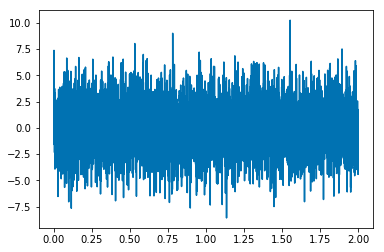

In [3]:
fs = 4000
t = np.arange(0, 2, 1 / fs)
x = simulate_ar_process(.5, 4, 2 * fs)
plt.plot(t, x)

Audio(x, rate=fs)

### b)

The following code takes the Discrete Fourier Transform of the signal `x`.

```
x_hat = np.fft.fft(x) / fs
```

This will create an array of complex numbers `x_hat` with the same length as `x`. These values represent the Fourier transform evaluated at $N$ equal frequencies between $[-f_s / 2, f_s / 2)$. The first $N/2$ values represent the Fourier coefficients for frequencies in $[0, f_s / 2)$, while the remaining $N/2$ values represent Fourier coefficients for frequencies in $[-f_s / 2, 0)$. (The frequencies "wrap around" after reaching the Nyquist limit $f_s / 2$.) We typically only plot the first half of the spectrum because the second half is just the reflection of the first half. We also plot the power (magnitude squared), since it's difficult to plot a complex-valued function! (We also scale this power by $f_s / N$ for technical reasons.)

```
freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
pow = np.abs(x_hat) ** 2
plt.plot(freqs[inds], fs / len(x) * pow[inds])
```

Plot the Fourier transform of the AR process you generated in (a).

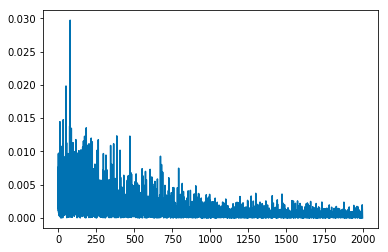

In [4]:
x_hat = np.fft.fft(x) / fs

freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
pow = np.abs(x_hat) ** 2
plt.plot(freqs[inds], fs / len(x) * pow[inds])

### c)

Notice how noisy the Fourier transform of a single realization is. Remember that the power spectral density for a discrete signal is defined as 

$$ S_X(f) = \frac{f_s}{N} E[|\hat X_N(f)|^2] $$

Therefore, to calculate the power spectral density, we have to calculate the expected value of the magnitude squared of the Fourier transform. In other words, we have to simulate many realizations, calculate the Fourier transform, and _average_ the power spectra to obtain the power spectral density.

Calculate and plot the power spectral density for the AR process in (a) by averaging the power of the Fourier transform over 20 realizations. (Ideally we would do more, but it would take too long.) Some starter code has been provided for you below.

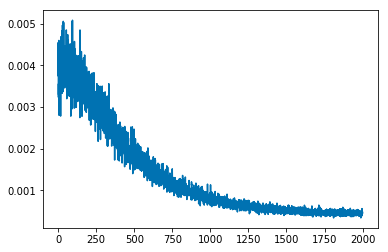

In [5]:
nsim = 100

# Define a variable that will store the average spectrum.
psd = np.zeros(len(x))
for i in range(nsim):
    # Simulate 2 seconds of an AR process. 
    x = simulate_ar_process(.5, 4, 2 * fs)
    # Take the Fourier transform and calculate the magnitude squared.
    pow = np.abs(np.fft.fft(x) / fs) ** 2
    # Add the result to what you have so far.
    psd += pow
    
# You now have the sum; divide by nsum to obtain the average.
psd = psd / nsim

# Plot the result.
freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
plt.plot(freqs[inds], fs / len(x) * psd[inds])

### d)

Use the function `simulate_ar_process` above to simulate 2 seconds of the AR process

$$ Y_n = (-.5) Y_{n - 1} + Z_{n}. $$

where $Z_1, Z_2, ... \sim \textrm{Normal}(0, 4)$, sampled at a rate of $f_s = 4000$ Hz.

Plot the signal and listen to it. How does it compare to the signal you generated in (a)?

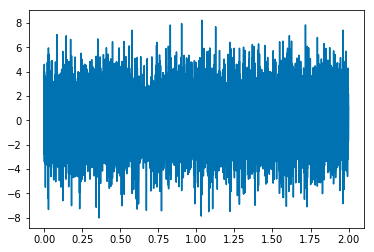

In [6]:
fs = 4000
t = np.arange(0, 2, 1 / fs)
x = simulate_ar_process(-.5, 4, 2 * fs)
plt.plot(t, x)

Audio(x, rate=fs)

### e)

Plot the Fourier transform of the AR process you generated in (d). How does this Fourier transform compare to the one in (b)?

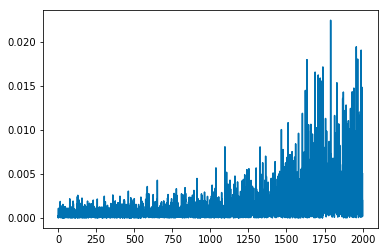

In [7]:
x_hat = np.fft.fft(x) / fs

freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
pow = np.abs(x_hat) ** 2
plt.plot(freqs[inds], fs / len(x) * pow[inds])

### f) 

Calculate and plot the power spectral density for the AR process in (d) by averaging the power of the Fourier transform over 20 realizations. How does this PSD compare to the one in (c)?

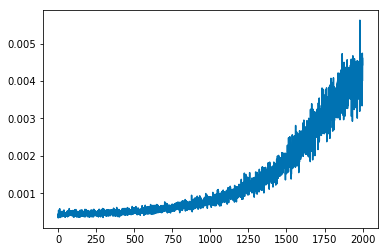

In [8]:
nsim = 100

# Define a variable that will store the average spectrum.
psd = np.zeros(len(x))
for i in range(nsim):
    # Simulate 2 seconds of an AR process. 
    x = simulate_ar_process(-.5, 4, 2 * fs)
    # Take the Fourier transform and calculate the magnitude squared.
    pow = np.abs(np.fft.fft(x) / fs) ** 2
    # Add the result to what you have so far.
    psd += pow
    
# You now have the sum; divide by nsum to obtain the average.
psd = psd / nsim

# Plot the result.
freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
plt.plot(freqs[inds], fs / len(x) * psd[inds])

## Problem 2)

Here is another example of a discrete time, continuous state process.  Suppose that for $n = 0, 1, 2, \ldots$,

$$ X_n = \theta Z_{n - 1} + Z_{n} $$

where $Z_{-1}, Z_0, Z_1, \ldots$ are i.i.d. $N(0, \sigma^2)$.  Such a process is called an *moving average* process (of order 1).  You can use the function provided below to simulate an MA process.

In [9]:
def simulate_ma_process(theta, var, N):
    """Simulate N steps of an MA process.
    
    phi: The parameter $\theta$ of the MA process.
    var: The noise variance ($\sigma^2$)
    N: Number of steps of the MA process to simulate.
    """
    x = np.zeros(N)
    z = (Normal(0, var) ** (N + 1)).draw()
    for i in range(N):
        x[i] = theta * z[i] + z[i + 1]
    return x

### a)

Use the function `simulate_ma_process` above to simulate 2 seconds of the MA process

$$ X_n = .5 Z_{n-1} + Z_n $$

where $Z_1, Z_2, ... \sim \textrm{Normal}(\mu = 0, \sigma^2 = 4)$, sampled at a rate of $f_s = 4000$ Hz.

Plot the signal and listen to it. You may build upon the sample code provided below. (Hint: Use `?np.arange` to view the documentation.)

```
fs = 4000
t = np.arange(...)
x = simulate_ma_process(...)
plt.plot(t, x)

Audio(x, rate=fs)
```

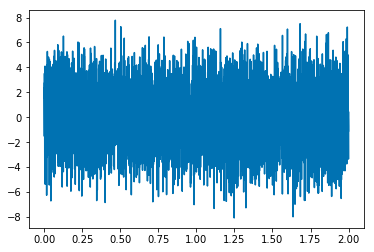

In [10]:
fs = 4000
t = np.arange(0, 2, 1 / fs)
x = simulate_ma_process(.5, 4, 2 * fs)
plt.plot(t, x)

Audio(x, rate=fs)

### b)

Plot the Fourier transform of the MA process you generated in 2(a). How does this Fourier transform compare to the Fourier transform you plotted in 1(b)?

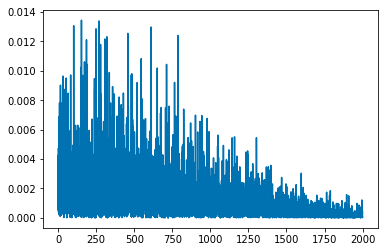

In [11]:
x_hat = np.fft.fft(x) / fs

freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
pow = np.abs(x_hat) ** 2
plt.plot(freqs[inds], fs / len(x) * pow[inds])

### c)

Calculate and plot the power spectral density for the MA process in 2(a) by averaging the power of the Fourier transform over 20 realizations. How does this PSD compare to the PSD you plotted in 1(c)?

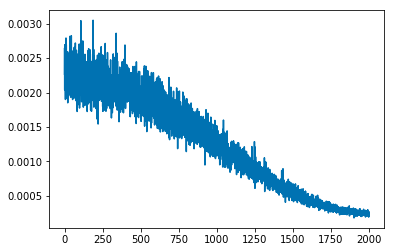

In [12]:
nsim = 100

# Define a variable that will store the average spectrum.
psd = np.zeros(len(x))
for i in range(nsim):
    # Simulate 2 seconds of an AR process. 
    x = simulate_ma_process(.5, 4, 2 * fs)
    # Take the Fourier transform and calculate the magnitude squared.
    pow = np.abs(np.fft.fft(x) / fs) ** 2
    # Add the result to what you have so far.
    psd += pow
    
# You now have the sum; divide by nsum to obtain the average.
psd = psd / nsim

# Plot the result.
freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
plt.plot(freqs[inds], fs / len(x) * psd[inds])

### d)

Use the function `simulate_ma_process` above to simulate 2 seconds of the MA process

$$ Y_n = (-.5) Z_{n - 1} + Z_{n} $$

where $Z_1, Z_2, ... \sim \textrm{Normal}(0, 4)$, sampled at a rate of $f_s = 4000$ Hz.

Plot the signal and listen to it. How does it compare to the signal you generated in 2(a)?

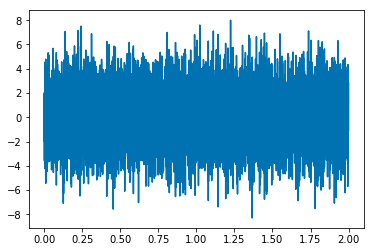

In [13]:
fs = 4000
t = np.arange(0, 2, 1 / fs)
x = simulate_ma_process(-.5, 4, 2 * fs)
plt.plot(t, x)

Audio(x, rate=fs)

### e)

Plot the Fourier transform of the MA process you generated in 2(d). How does this Fourier transform compare to the ones in 1(e) and 2(b)?

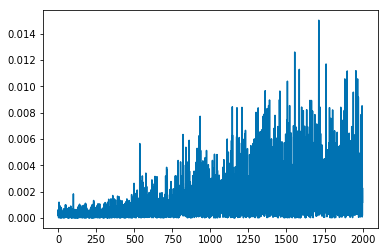

In [14]:
x_hat = np.fft.fft(x) / fs

freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
pow = np.abs(x_hat) ** 2
plt.plot(freqs[inds], fs / len(x) * pow[inds])

### f)

Calculate and plot the power spectral density for the MA process in 2(d) by averaging the power of the Fourier transform over 20 realizations. How does this PSD compare to the ones in 1(f) and 2(c)?

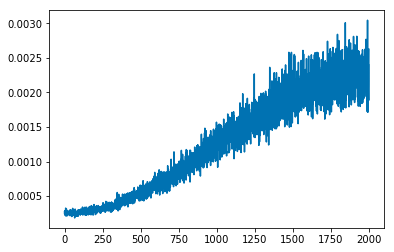

In [15]:
nsim = 100

# Define a variable that will store the average spectrum.
psd = np.zeros(len(x))
for i in range(nsim):
    # Simulate 2 seconds of an AR process. 
    x = simulate_ma_process(-.5, 4, 2 * fs)
    # Take the Fourier transform and calculate the magnitude squared.
    pow = np.abs(np.fft.fft(x) / fs) ** 2
    # Add the result to what you have so far.
    psd += pow
    
# You now have the sum; divide by nsum to obtain the average.
psd = psd / nsim

# Plot the result.
freqs = np.arange(0, fs, fs / len(x))
inds = np.arange(len(x) // 2)
plt.plot(freqs[inds], fs / len(x) * psd[inds])

## Submission Instructions

Before you submit this notebook, click the "Kernel" drop-down menu at the top of this page and select "Restart & Run All". This will ensure that all of the code in your notebook executes properly. Please fix any errors, and repeat the process until the entire notebook executes without any errors.

Then, to submit your notebook, follow these instructions:
- Save your notebook by going to `File > Save and Checkpoint`. 
- Download your notebook by going to `File > Download as > Notebook (.ipynb)`.
- Upload the downloaded `.ipynb` file to PolyLearn.